In [194]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.patches as patches

data = pd.read_csv('~/Downloads/Conferences/Combined_CSV/ACC_combined/uvacombined.csv', low_memory=False)


In [256]:
filtered_df = data[data['Batter'].str.contains('Ford, Henry', na=False)]
filtered_df.head()

,PitchNo,Date,Time,PAofInning,PitchofPA,Pitcher,PitcherId,PitcherThrows,PitcherTeam,Batter,...,ThrowTrajectoryZc1,ThrowTrajectoryZc2,PitchReleaseConfidence,PitchLocationConfidence,PitchMovementConfidence,HitLaunchConfidence,HitLandingConfidence,CatcherThrowCatchConfidence,CatcherThrowReleaseConfidence,CatcherThrowLocationConfidence
8667,32,2024-02-16,15:21:54.50,4,1,"O'Hanlon, Michael",1.000061e+09,Right,HOF_PRI,"Ford, Henry",...,NaN,NaN,High,High,High,NaN,NaN,NaN,NaN,NaN
8668,33,2024-02-16,15:22:16.22,4,2,"O'Hanlon, Michael",1.000061e+09,Right,HOF_PRI,"Ford, Henry",...,NaN,NaN,High,High,High,NaN,NaN,NaN,NaN,NaN
8669,34,2024-02-16,15:22:37.55,4,3,"O'Hanlon, Michael",1.000061e+09,Right,HOF_PRI,"Ford, Henry",...,NaN,NaN,High,High,High,NaN,NaN,NaN,NaN,NaN
8670,35,2024-02-16,15:23:06.76,4,4,"O'Hanlon, Michael",1.000061e+09,Right,HOF_PRI,"Ford, Henry",...,NaN,NaN,High,High,High,NaN,NaN,NaN,NaN,NaN
8671,36,2024-02-16,15:23:28.39,4,5,"O'Hanlon, Michael",1.000061e+09,Right,HOF_PRI,"Ford, Henry",...,NaN,NaN,High,High,High,NaN,NaN,NaN,NaN,NaN


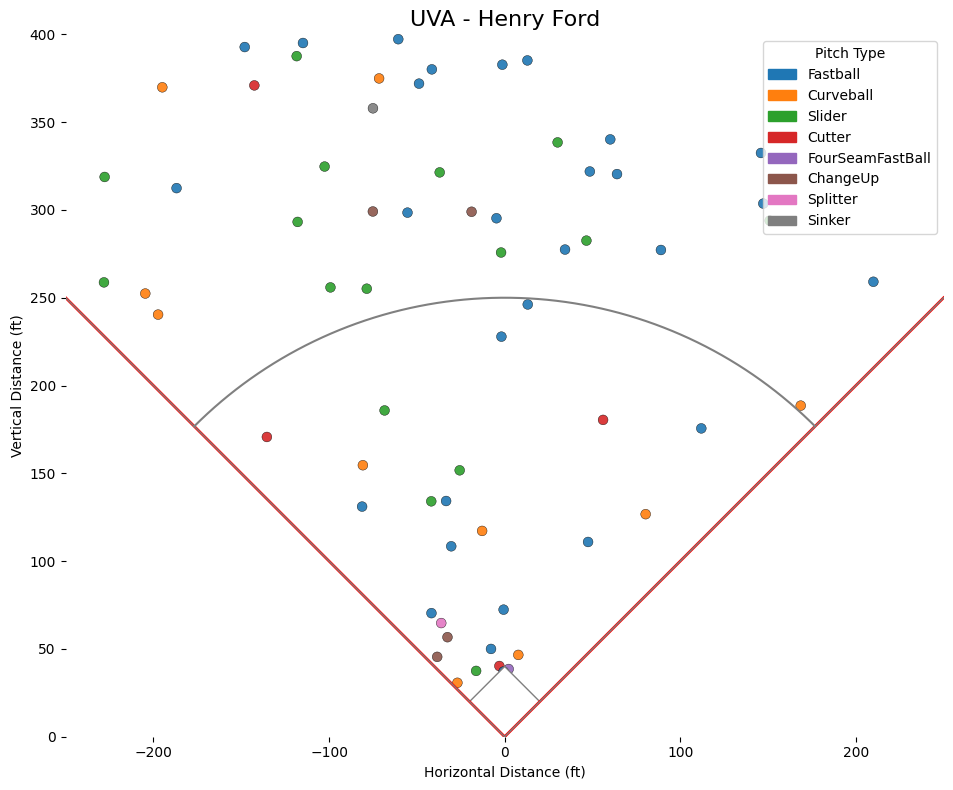

In [257]:
from matplotlib.patches import Patch
fair_data = filtered_df[
    (filtered_df['Direction'] >= -45) &
    (filtered_df['Direction'] <= 45) &
     (filtered_df['Distance'] >= 30)
].dropna(subset=['Distance'])

fair_data['Direction_rad'] = np.deg2rad(fair_data['Direction'])
fair_data['SprayX'] = fair_data['Distance'] * np.sin(fair_data['Direction_rad'])
fair_data['SprayY'] = fair_data['Distance'] * np.cos(fair_data['Direction_rad'])

pitch_types = fair_data['TaggedPitchType'].unique()
palette = dict(zip(pitch_types, sns.color_palette(n_colors=len(pitch_types))))
colors = fair_data['TaggedPitchType'].map(palette)

fig, ax = plt.subplots(figsize=(12, 8))

outfield = plt.Circle((0, 0), 250, color='white', fill=True, zorder=0)
ax.add_artist(outfield)
ax.plot([0, -250], [0, 250], color='red', linewidth=2)  # Left foul line
ax.plot([0, 250], [0, 250], color='red', linewidth=2)   # Right foul line

ax.scatter(
    fair_data['SprayX'], 
    fair_data['SprayY'], 
    color= colors, 
    alpha=0.9, 
    edgecolor='black', 
    linewidth=0.3,
    s=50
)

ax.set_xlim(-250, 250)
ax.set_ylim(0, 400)
ax.set_aspect('equal')
ax.set_facecolor('white')
sns.despine(left=True, bottom=True)

legend_handles = [Patch(color=palette[p], label=p) for p in pitch_types]
ax.legend(handles=legend_handles, title='Pitch Type', loc='upper right')

theta = np.linspace(-np.pi/4, np.pi/4, 300)
arc_x = 250 * np.sin(theta)
arc_y = 250 * np.cos(theta)
ax.plot(arc_x, arc_y, color='gray', linewidth=1.5)

ax.plot([0, -250], [0, 250], color='gray', linewidth=1)
ax.plot([0, 250], [0, 250], color='gray', linewidth=1)

base_size = 20
diamond = patches.Polygon(
    [[0, 0], [base_size, base_size], [0, 2 * base_size], [-base_size, base_size]],
    closed=True, edgecolor='gray', facecolor='white'
)
ax.add_patch(diamond)


plt.title('UVA - Henry Ford', fontsize=16)
plt.xlabel('Horizontal Distance (ft)')
plt.ylabel('Vertical Distance (ft)')
plt.tight_layout()
plt.show()

In [259]:
import plotly.graph_objects as go


fair_data['Direction_rad'] = np.deg2rad(fair_data['Direction'])
fair_data['SprayX'] = fair_data['Distance'] * np.sin(fair_data['Direction_rad'])
fair_data['SprayY'] = fair_data['Distance'] * np.cos(fair_data['Direction_rad'])

pitch_types = fair_data['TaggedPitchType'].unique()
palette = dict(zip(pitch_types, sns.color_palette("hsv", n_colors=len(pitch_types)).as_hex()))
fair_data['Color'] = fair_data['TaggedPitchType'].map(palette)

fig = go.Figure()

for pitch in pitch_types:
    df_subset = fair_data[fair_data['TaggedPitchType'] == pitch]
    fig.add_trace(go.Scatter(
        x=df_subset['SprayX'],
        y=df_subset['SprayY'],
        mode='markers',
        marker=dict(size=8, color=palette[pitch], line=dict(width=0.5, color='black')),
        name=pitch,
        hovertemplate=f"<b>{pitch}</b><br>X: %{{x}}<br>Y: %{{y}}<extra></extra>"
    ))


fig.add_shape(type="line", x0=0, y0=0, x1=-250, y1=250, line=dict(color="red", width=2))
fig.add_shape(type="line", x0=0, y0=0, x1=250, y1=250, line=dict(color="red", width=2))

theta = np.linspace(-np.pi/4, np.pi/4, 200)
arc_x = 250 * np.sin(theta)
arc_y = 250 * np.cos(theta)
fig.add_trace(go.Scatter(x=arc_x, y=arc_y, mode='lines', line=dict(color='lightgray'), showlegend=False))

base_path = [
    dict(
        type='line',
        x0=0, y0=0,
        x1=15, y1=15,
        line=dict(color='black', width=2)
    ),
    dict(
        type='line',
        x0=15, y0=15,
        x1=0, y1=30,
        line=dict(color='black', width=2)
    ),
    dict(
        type='line',
        x0=0, y0=30,
        x1=-15, y1=15,
        line=dict(color='black', width=2)
    ),
    dict(
        type='line',
        x0=-15, y0=15,
        x1=0, y1=0,
        line=dict(color='black', width=2)
    ),
]


fig.update_layout(
    title="Henry Ford (Interactive)",
    xaxis=dict(title="Horizontal Distance (ft)", range=[-250, 250], showgrid=True),
    yaxis=dict(title="Vertical Distance (ft)", range=[0, 400], showgrid=True),
    width=800,
    height=700,
    plot_bgcolor='white',
    legend_title_text='Pitch Type'
)

fig.update_yaxes(scaleanchor="x", scaleratio=1)
fig.show()


In [254]:
import plotly.graph_objects as go

fair_data = data[
    (data['Direction'] >= -45) &
    (data['Direction'] <= 45) &
     (data['Distance'] >= 30)
].dropna(subset=['Distance'])

fair_data['Direction_rad'] = np.deg2rad(fair_data['Direction'])
fair_data['SprayX'] = fair_data['Distance'] * np.sin(fair_data['Direction_rad'])
fair_data['SprayY'] = fair_data['Distance'] * np.cos(fair_data['Direction_rad'])


selected_batters = ['Ford, Henry', 'Teel, Aidan', 'Hanson, Luke', 'Godbout, Henry', 'Becker, Eric']
subset_data = fair_data[fair_data['Batter'].isin(selected_batters)]
batters = subset_data['Batter'].unique()


pitch_types = fair_data['TaggedPitchType'].unique()
palette = dict(zip(pitch_types, sns.color_palette("hsv", n_colors=len(pitch_types)).as_hex()))
fair_data['Color'] = fair_data['TaggedPitchType'].map(palette)

fig = go.Figure()


for i, batter in enumerate(batters):
    batter_data = fair_data[fair_data['Batter'] == batter]
    fig.add_trace(go.Scatter(
        x=batter_data['SprayX'],
        y=batter_data['SprayY'],
        mode='markers',
        marker=dict(size=8, color=batter_data['TaggedPitchType'].map(palette), 
                    line=dict(width=1, color='black')),
        name='',
        visible=(i == 0),
        hovertemplate=(
            "Distance: %{customdata[0]} ft<br>" +
            "Pitch Type: %{customdata[1]}"
        ),
        customdata=np.stack((batter_data['Distance'], batter_data['TaggedPitchType']), axis=-1)
    ))

dropdown_buttons = [
    dict(
        label=batter,
        method='update',
        args=[
            {"visible": [i == j for j in range(len(batters))]},
            {"title": f"Spray Chart for {batter}"}
        ]
    )
    for i, batter in enumerate(batters)
]

foul_lines = [
    dict(type="line", x0=0, y0=0, x1=-250, y1=250, line=dict(color="red", width=2)),
    dict(type="line", x0=0, y0=0, x1=250, y1=250, line=dict(color="red", width=2))
]

theta = np.linspace(-np.pi/4, np.pi/4, 200)
arc_x = 250 * np.sin(theta)
arc_y = 250 * np.cos(theta)
fig.add_trace(go.Scatter(x=arc_x, y=arc_y, mode='lines', line=dict(color='lightgray'), showlegend=False))

base_path = [
    dict(
        type='line',
        x0=0, y0=0,
        x1=15, y1=15,
        line=dict(color='black', width=2)
    ),
    dict(
        type='line',
        x0=15, y0=15,
        x1=0, y1=30,
        line=dict(color='black', width=2)
    ),
    dict(
        type='line',
        x0=0, y0=30,
        x1=-15, y1=15,
        line=dict(color='black', width=2)
    ),
    dict(
        type='line',
        x0=-15, y0=15,
        x1=0, y1=0,
        line=dict(color='black', width=2)
    ),
]

fig.update_layout(
    updatemenus=[
        dict(
            active=0,
            buttons=dropdown_buttons,
            x=0.7,
            xanchor='left',
            y=1.15,
            yanchor='top'
        )
    ],
    shapes=foul_lines + base_path,
    title=f"Spray Chart",
    xaxis=dict(range=[-250, 250], title='Horizontal Distance (ft)'),
    yaxis=dict(range=[0, 400], title='Vertical Distance (ft)', scaleanchor='x'),
    plot_bgcolor='white',
    width=900,
    height=700,
    showlegend=False
)

fig.show()

**VCU**

In [166]:
vcu = pd.read_csv('~/Downloads/Conferences/Combined_CSV/ATL_10/vcucombined.csv', low_memory=False)


In [167]:
filtered_vcu = vcu[vcu['Batter'].str.contains('Eike, Brandon', na=False)]

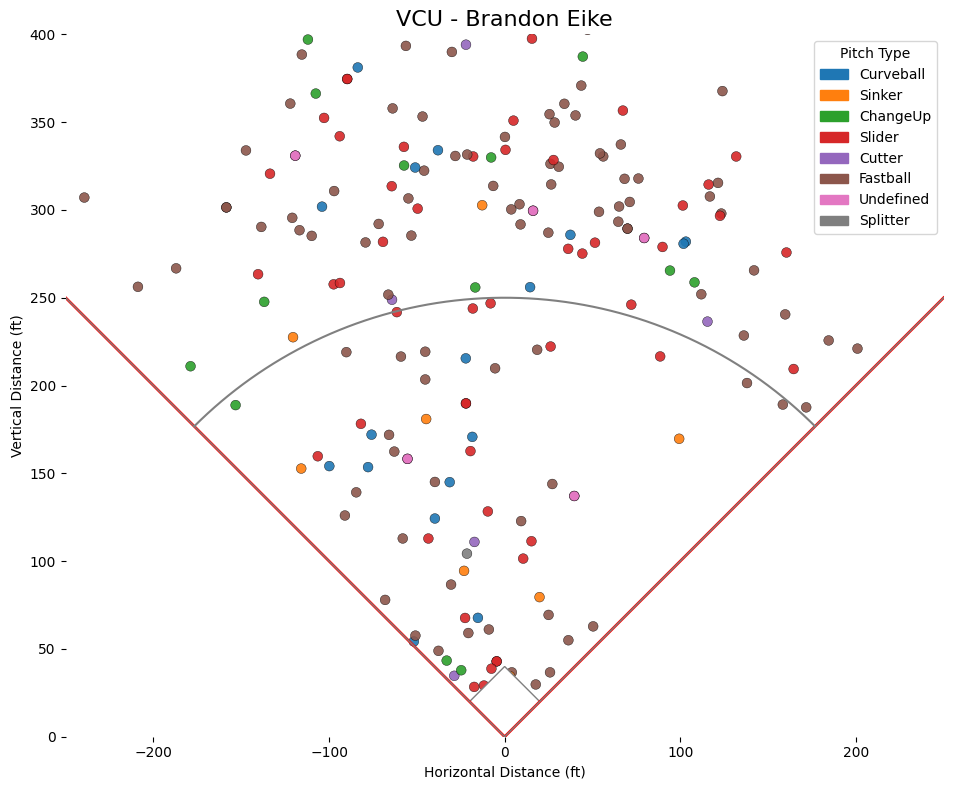

In [261]:
fair_vcu = filtered_vcu[
    (filtered_vcu['Direction'] >= -45) &
    (filtered_vcu['Direction'] <= 45) &
     (filtered_vcu['Distance'] >= 30)
].dropna(subset=['Distance'])

fair_vcu['Direction_rad'] = np.deg2rad(fair_vcu['Direction'])
fair_vcu['SprayX'] = fair_vcu['Distance'] * np.sin(fair_vcu['Direction_rad'])
fair_vcu['SprayY'] = fair_vcu['Distance'] * np.cos(fair_vcu['Direction_rad'])

pitch_types = fair_vcu['TaggedPitchType'].unique()
palette = dict(zip(pitch_types, sns.color_palette(n_colors=len(pitch_types))))
colors = fair_vcu['TaggedPitchType'].map(palette)

fig, ax = plt.subplots(figsize=(12, 8))

outfield = plt.Circle((0, 0), 250, color='white', fill=True, zorder=0)
ax.add_artist(outfield)
ax.plot([0, -250], [0, 250], color='red', linewidth=2)  # Left foul line
ax.plot([0, 250], [0, 250], color='red', linewidth=2)   # Right foul line

ax.scatter(
    fair_vcu['SprayX'], 
    fair_vcu['SprayY'], 
    color= colors, 
    alpha=0.9, 
    edgecolor='black', 
    linewidth=0.3,
    s=50
)

ax.set_xlim(-250, 250)
ax.set_ylim(0, 400)
ax.set_aspect('equal')
ax.set_facecolor('white')
sns.despine(left=True, bottom=True)

legend_handles = [Patch(color=palette[p], label=p) for p in pitch_types]
ax.legend(handles=legend_handles, title='Pitch Type', loc='upper right')

theta = np.linspace(-np.pi/4, np.pi/4, 300)
arc_x = 250 * np.sin(theta)
arc_y = 250 * np.cos(theta)
ax.plot(arc_x, arc_y, color='gray', linewidth=1.5)

ax.plot([0, -250], [0, 250], color='gray', linewidth=1)
ax.plot([0, 250], [0, 250], color='gray', linewidth=1)

base_size = 20
diamond = patches.Polygon(
    [[0, 0], [base_size, base_size], [0, 2 * base_size], [-base_size, base_size]],
    closed=True, edgecolor='gray', facecolor='white'
)
ax.add_patch(diamond)

plt.title('VCU - Brandon Eike', fontsize=16)
plt.xlabel('Horizontal Distance (ft)')
plt.ylabel('Vertical Distance (ft)')
plt.tight_layout()
plt.show()

In [ ]:
fair_vcu['Direction_rad'] = np.deg2rad(fair_vcu['Direction'])
fair_vcu['SprayX'] = fair_vcu['Distance'] * np.sin(fair_vcu['Direction_rad'])
fair_vcu['SprayY'] = fair_vcu['Distance'] * np.cos(fair_vcu['Direction_rad'])

pitch_types = fair_vcu['TaggedPitchType'].unique()
palette = dict(zip(pitch_types, sns.color_palette("hsv", n_colors=len(pitch_types)).as_hex()))
fair_vcu['Color'] = fair_vcu['TaggedPitchType'].map(palette)

fig = go.Figure()

for pitch in pitch_types:
    df_subset = fair_vcu[fair_vcu['TaggedPitchType'] == pitch]
    fig.add_trace(go.Scatter(
        x=df_subset['SprayX'],
        y=df_subset['SprayY'],
        mode='markers',
        marker=dict(size=8, color=palette[pitch], line=dict(width=0.5, color='black')),
        name=pitch,
        hovertemplate=f"<b>{pitch}</b><br>X: %{{x}}<br>Y: %{{y}}<extra></extra>"
    ))


fig.add_shape(type="line", x0=0, y0=0, x1=-250, y1=250, line=dict(color="red", width=2))
fig.add_shape(type="line", x0=0, y0=0, x1=250, y1=250, line=dict(color="red", width=2))

theta = np.linspace(-np.pi/4, np.pi/4, 200)
arc_x = 250 * np.sin(theta)
arc_y = 250 * np.cos(theta)
fig.add_trace(go.Scatter(x=arc_x, y=arc_y, mode='lines', line=dict(color='lightgray'), showlegend=False))

base_path = [
    dict(
        type='line',
        x0=0, y0=0,
        x1=15, y1=15,
        line=dict(color='black', width=2)
    ),
    dict(
        type='line',
        x0=15, y0=15,
        x1=0, y1=30,
        line=dict(color='black', width=2)
    ),
    dict(
        type='line',
        x0=0, y0=30,
        x1=-15, y1=15,
        line=dict(color='black', width=2)
    ),
    dict(
        type='line',
        x0=-15, y0=15,
        x1=0, y1=0,
        line=dict(color='black', width=2)
    ),
]

fig.update_layout(
    title="Brandon Eike (Interactive)",
    xaxis=dict(title="Horizontal Distance (ft)", range=[-250, 250], showgrid=True),
    yaxis=dict(title="Vertical Distance (ft)", range=[0, 400], showgrid=True),
    width=800,
    height=700,
    shapes = base_path,
    plot_bgcolor='white',
    legend_title_text='Pitch Type'
)

fig.update_yaxes(scaleanchor="x", scaleratio=1)
fig.show()


In [253]:
fair_vcu = vcu[
    (vcu['Direction'] >= -45) &
    (vcu['Direction'] <= 45) &
     (vcu['Distance'] >= 30)
].dropna(subset=['Distance'])

fair_vcu['Direction_rad'] = np.deg2rad(fair_vcu['Direction'])
fair_vcu['SprayX'] = fair_vcu['Distance'] * np.sin(fair_vcu['Direction_rad'])
fair_vcu['SprayY'] = fair_vcu['Distance'] * np.cos(fair_vcu['Direction_rad'])

vcu_batters = ['Bean, William', 'Eike, Brandon', 'Weisner, Eli', 'Hill, Aden', 'McHugh, Chris']
vcu_subset = fair_vcu[fair_vcu['Batter'].isin(vcu_batters)]
batters = vcu_subset['Batter'].unique()

pitch_types = fair_vcu['TaggedPitchType'].unique()
palette = dict(zip(pitch_types, sns.color_palette("hsv", n_colors=len(pitch_types)).as_hex()))
fair_vcu['Color'] = fair_vcu['TaggedPitchType'].map(palette)

fig=go.Figure()

for i, batter in enumerate(batters):
    batter_data = fair_vcu[fair_vcu['Batter']==batter]
    fig.add_trace(go.Scatter(
        x=batter_data['SprayX'],
        y=batter_data['SprayY'],
        mode='markers',
        marker=dict(size=8, color=batter_data['TaggedPitchType'].map(palette),
                    line=dict(width=1, color='black')),
        name='',
        visible = (i==0),
        hovertemplate=(
            "Distance: %{customdata[0]} ft<br>" +
            "Pitch Type: %{customdata[1]}"
        ),
        customdata=np.stack((batter_data['Distance'], batter_data['TaggedPitchType']), axis=1)
    ))

dropdown_buttons = [
    dict(label=batter,
         method='update',
         args=[{"visible": [i==j for j in range(len(batters))]},
               {"title": f"Spray Chart for {batter}"}]
               )
               for i, batter in enumerate(batters)
]

foul_lines = [
    dict(type='line', x0=0, y0=0, x1=-250, y1=250, line=dict(color='red', width=2)),
    dict(type='line', x0=0, y0=0, x1=250, y1=250, line=dict(color='red', width=2))

]

theta = np.linspace(-np.pi/4, np.pi/4, 200)
arc_x = 250 * np.sin(theta)
arc_y = 250 * np.cos(theta)
fig.add_trace(go.Scatter(x=arc_x, y=arc_y, mode='lines', line=dict(color='lightgray'), showlegend=False))

base_path = [
    dict(
        type='line',
        x0=0, y0=0,
        x1=15, y1=15,
        line=dict(color='black', width=2)
    ),
    dict(
        type='line',
        x0=15, y0=15,
        x1=0, y1=30,
        line=dict(color='black', width=2)
    ),
    dict(
        type='line',
        x0=0, y0=30,
        x1=-15, y1=15,
        line=dict(color='black', width=2)
    ),
    dict(
        type='line',
        x0=-15, y0=15,
        x1=0, y1=0,
        line=dict(color='black', width=2)
    ),
]

fig.update_layout(
    updatemenus=[
        dict(
            active=0,
            buttons=dropdown_buttons,
            x=0.7,
            xanchor='left',
            y=1.15,
            yanchor='top'
        )
    ],
    shapes=foul_lines + base_path,
    xaxis = dict(range=[-250, 250], title="Horizontal Distance"),
    yaxis=dict(range=[0,400], title="Vertical Distance"),
    plot_bgcolor='white',
    width=900,
    height=700,
    showlegend=False
)
fig.show()

**Davidson**

In [204]:
davidson = pd.read_csv('~/Downloads/Conferences/Combined_CSV/ATL_10/davidsoncombined.csv', low_memory=False)

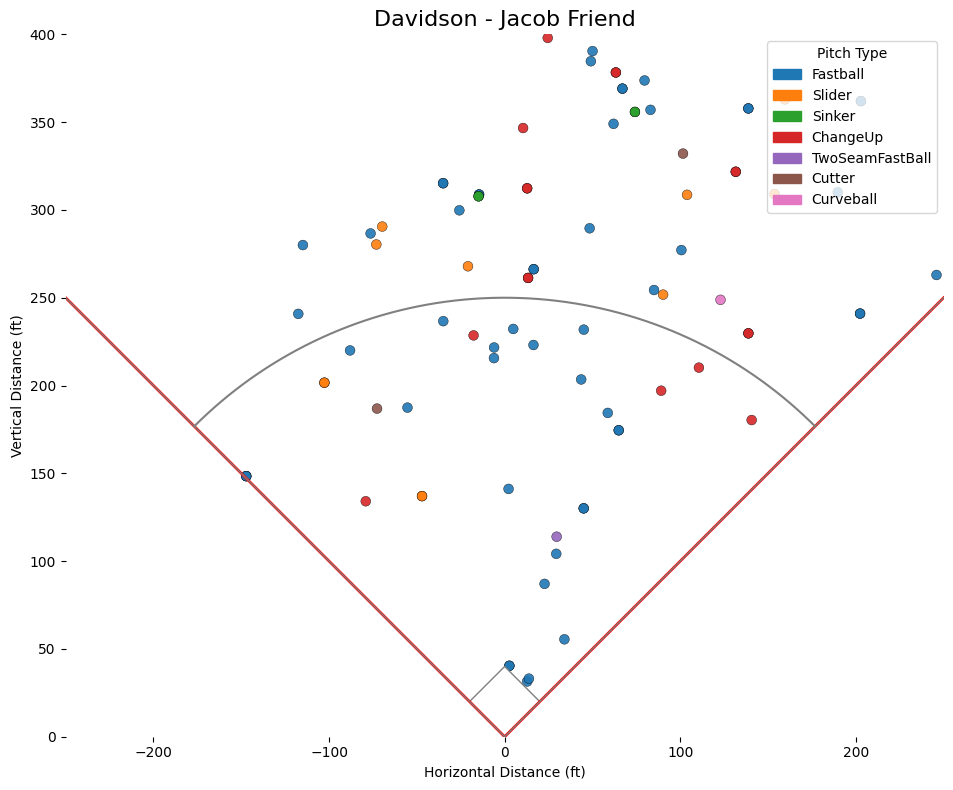

In [205]:
fair_davidson = davidson[davidson['Batter'].str.contains('Friend, Jacob', na=False)]

fair_davidson = fair_davidson[
    (fair_davidson['Direction'] >= -45) &
    (fair_davidson['Direction'] <= 45) &
     (fair_davidson['Distance'] >= 30)
].dropna(subset=['Distance'])

fair_davidson['Direction_rad'] = np.deg2rad(fair_davidson['Direction'])
fair_davidson['SprayX'] = fair_davidson['Distance'] * np.sin(fair_davidson['Direction_rad'])
fair_davidson['SprayY'] = fair_davidson['Distance'] * np.cos(fair_davidson['Direction_rad'])

pitch_types = fair_davidson['TaggedPitchType'].unique()
palette = dict(zip(pitch_types, sns.color_palette(n_colors=len(pitch_types))))
colors = fair_davidson['TaggedPitchType'].map(palette)

fig, ax = plt.subplots(figsize=(12, 8))
outfield = plt.Circle((0, 0), 250, color='white', fill=True, zorder=0)
ax.add_artist(outfield)
ax.plot([0, -250], [0, 250], color='red', linewidth=2)  # Left foul line
ax.plot([0, 250], [0, 250], color='red', linewidth=2)   # Right foul line
ax.scatter(
    fair_davidson['SprayX'], 
    fair_davidson['SprayY'], 
    color= colors, 
    alpha=0.9, 
    edgecolor='black', 
    linewidth=0.3,
    s=50
)

ax.set_xlim(-250, 250)
ax.set_ylim(0, 400)
ax.set_aspect('equal')
ax.set_facecolor('white')
sns.despine(left=True, bottom=True)

legend_handles = [Patch(color=palette[p], label=p) for p in pitch_types]
ax.legend(handles=legend_handles, title='Pitch Type', loc='upper right')

theta = np.linspace(-np.pi/4, np.pi/4, 300)
arc_x = 250 * np.sin(theta)
arc_y = 250 * np.cos(theta)
ax.plot(arc_x, arc_y, color='gray', linewidth=1.5)

ax.plot([0, -250], [0, 250], color='gray', linewidth=1)
ax.plot([0, 250], [0, 250], color='gray', linewidth=1)

base_size = 20
diamond = patches.Polygon(
    [[0, 0], [base_size, base_size], [0, 2 * base_size], [-base_size, base_size]],
    closed=True, edgecolor='gray', facecolor='white'
)
ax.add_patch(diamond)

plt.title('Davidson - Jacob Friend', fontsize=16)
plt.xlabel('Horizontal Distance (ft)')
plt.ylabel('Vertical Distance (ft)')
plt.tight_layout()
plt.show()

In [206]:
fair_davidson['Direction_rad'] = np.deg2rad(fair_davidson['Direction'])
fair_davidson['SprayX'] = fair_davidson['Distance'] * np.sin(fair_davidson['Direction_rad'])
fair_davidson['SprayY'] = fair_davidson['Distance'] * np.cos(fair_davidson['Direction_rad'])

pitch_types = fair_davidson['TaggedPitchType'].unique()
palette = dict(zip(pitch_types, sns.color_palette("hsv", n_colors=len(pitch_types)).as_hex()))
fair_davidson['Color'] = fair_davidson['TaggedPitchType'].map(palette)

fig= go.Figure()

for pitch in pitch_types:
    df_subset = fair_davidson[fair_davidson['TaggedPitchType'] == pitch]
    fig.add_trace(go.Scatter(
        x=df_subset['SprayX'],
        y=df_subset['SprayY'],
        mode='markers',
        marker=dict(size=8, color=palette[pitch], line=dict(width=0.5, color='black')),
        name=pitch,
        hovertemplate=f"<b>{pitch}</b><br>X: %{{x}}<br>Y: %{{y}}<extra></extra>"
    ))
fig.add_shape(type="line", x0=0, y0=0, x1=-250, y1=250, line=dict(color="red", width=2))
fig.add_shape(type="line", x0=0, y0=0, x1=250, y1=250, line=dict(color="red", width=2))

theta = np.linspace(-np.pi/4, np.pi/4, 200)
arc_x = 250 * np.sin(theta)
arc_y = 250 * np.cos(theta)
fig.add_trace(go.Scatter(x=arc_x, y=arc_y, mode='lines', line=dict(color='lightgray'), showlegend=False))

base_path = [
    dict(
        type='line',
        x0=0, y0=0,
        x1=15, y1=15,
        line=dict(color='black', width=2)
    ),
    dict(
        type='line',
        x0=15, y0=15,
        x1=0, y1=30,
        line=dict(color='black', width=2)
    ),
    dict(
        type='line',
        x0=0, y0=30,
        x1=-15, y1=15,
        line=dict(color='black', width=2)
    ),
    dict(
        type='line',
        x0=-15, y0=15,
        x1=0, y1=0,
        line=dict(color='black', width=2)
    ),
]


fig.update_layout(
    title="Jacob Friend (Interactive)",
    xaxis=dict(title="Horizontal Distance (ft)", range=[-250, 250], showgrid=True),
    yaxis=dict(title="Vertical Distance (ft)", range=[0, 400], showgrid=True),
    shapes=base_path,
    width=800,
    height=700,
    plot_bgcolor='white',
    legend_title_text='Pitch Type'
)
fig.update_yaxes(scaleanchor="x", scaleratio=1)
fig.show()

In [251]:
fig = go.Figure()

fair_davidson = davidson[
    (davidson['Direction'] >= -45) &
    (davidson['Direction'] <= 45) &
     (davidson['Distance'] >= 30)
].dropna(subset=['Distance'])

fair_davidson['Direction_rad'] = np.deg2rad(fair_davidson['Direction'])
fair_davidson['SprayX'] = fair_davidson['Distance'] * np.sin(fair_davidson['Direction_rad'])
fair_davidson['SprayY'] = fair_davidson['Distance'] * np.cos(fair_davidson['Direction_rad'])

davidson_batters = ['Friend, Jacob', 'Rice, Aidan', 'Canon, Cider', 'Wilhoit, Jake', 'Putnam, Eli']
davidson_subset = fair_davidson[fair_davidson['Batter'].isin(davidson_batters)]
batters = davidson_subset['Batter'].unique()

pitch_types = fair_davidson['TaggedPitchType'].unique()
palette = dict(zip(pitch_types, sns.color_palette("hsv", n_colors=len(pitch_types)).as_hex()))
fair_davidson['Color'] = fair_davidson['TaggedPitchType'].map(palette)

for i, batter in enumerate(batters):
    batter_data = fair_davidson[fair_davidson['Batter'] == batter]
    fig.add_trace(go.Scatter(
        x=batter_data['SprayX'],
        y=batter_data['SprayY'],
        mode='markers',
        marker=dict(size=8, color=batter_data['TaggedPitchType'].map(palette), 
                    line=dict(width=1, color='black')),
        name='',
        visible=(i == 0),
        hovertemplate=(
            "Distance: %{customdata[0]} ft<br>" +
            "Pitch Type: %{customdata[1]}"
        ),
        customdata=np.stack((batter_data['Distance'], batter_data['TaggedPitchType']), axis=-1)
    ))
dropdown_buttons = [
    dict(
        label=batter,
        method='update',
        args=[
            {"visible": [i == j for j in range(len(batters))]},
            {"title": f"Spray Chart for {batter}"}
        ]
    )
    for i, batter in enumerate(batters)
]
foul_lines = [
    dict(type="line", x0=0, y0=0, x1=-250, y1=250, line=dict(color="red", width=2)),
    dict(type="line", x0=0, y0=0, x1=250, y1=250, line=dict(color="red", width=2))
]

theta = np.linspace(-np.pi/4, np.pi/4, 200)
arc_x = 250 * np.sin(theta)
arc_y = 250 * np.cos(theta)
fig.add_trace(go.Scatter(x=arc_x, y=arc_y, mode='lines', line=dict(color='lightgray'), showlegend=False))

base_path = [
    dict(
        type='line',
        x0=0, y0=0,
        x1=15, y1=15,
        line=dict(color='black', width=2)
    ),
    dict(
        type='line',
        x0=15, y0=15,
        x1=0, y1=30,
        line=dict(color='black', width=2)
    ),
    dict(
        type='line',
        x0=0, y0=30,
        x1=-15, y1=15,
        line=dict(color='black', width=2)
    ),
    dict(
        type='line',
        x0=-15, y0=15,
        x1=0, y1=0,
        line=dict(color='black', width=2)
    ),
]

fig.update_layout(
    updatemenus=[
        dict(
            active=0,
            buttons=dropdown_buttons,
            x=0.7,
            xanchor='left',
            y=1.15,
            yanchor='top'
        )
    ],
    shapes=foul_lines + base_path,
    title=f"Davidson Spray Chart",
    xaxis=dict(range=[-250, 250], title='Horizontal Distance (ft)'),
    yaxis=dict(range=[0, 400], title='Vertical Distance (ft)', scaleanchor='x'),
    plot_bgcolor='white',
    width=900,
    height=700,
    showlegend=False
)

fig.show()

In [175]:
vt = pd.read_csv('~/Downloads/Conferences/Combined_CSV/ACC_combined/errors/vtcombined.csv',
    engine='python', on_bad_lines='skip')
vt.head()

,PitchNo,Date,Time,PAofInning,PitchofPA,Pitcher,PitcherId,PitcherThrows,PitcherTeam,Batter,...,ThrowTrajectoryZc1,ThrowTrajectoryZc2,PitchReleaseConfidence,PitchLocationConfidence,PitchMovementConfidence,HitLaunchConfidence,HitLandingConfidence,CatcherThrowCatchConfidence,CatcherThrowReleaseConfidence,CatcherThrowLocationConfidence
0,1,2023-02-18,14:04:41.94,1,1,"Pooser, Trey",1000080959,Right,COL_CHA,"Bryant, David",...,NaN,NaN,High,High,High,NaN,NaN,NaN,NaN,NaN
1,2,2023-02-18,14:04:53.82,1,2,"Pooser, Trey",1000080959,Right,COL_CHA,"Bryant, David",...,NaN,NaN,High,High,High,NaN,NaN,NaN,NaN,NaN
2,3,2023-02-18,14:05:05.33,1,3,"Pooser, Trey",1000080959,Right,COL_CHA,"Bryant, David",...,NaN,NaN,High,High,High,Low,Low,NaN,NaN,NaN
3,4,2023-02-18,14:05:39.86,1,4,"Pooser, Trey",1000080959,Right,COL_CHA,"Bryant, David",...,NaN,NaN,High,High,High,High,Low,NaN,NaN,NaN
4,5,2023-02-18,14:05:54.86,1,5,"Pooser, Trey",1000080959,Right,COL_CHA,"Bryant, David",...,NaN,NaN,High,High,High,NaN,NaN,NaN,NaN,NaN


In [176]:
vt_filtered= vt[vt['Batter'].str.contains('DeMartini, Carson', na=False)]

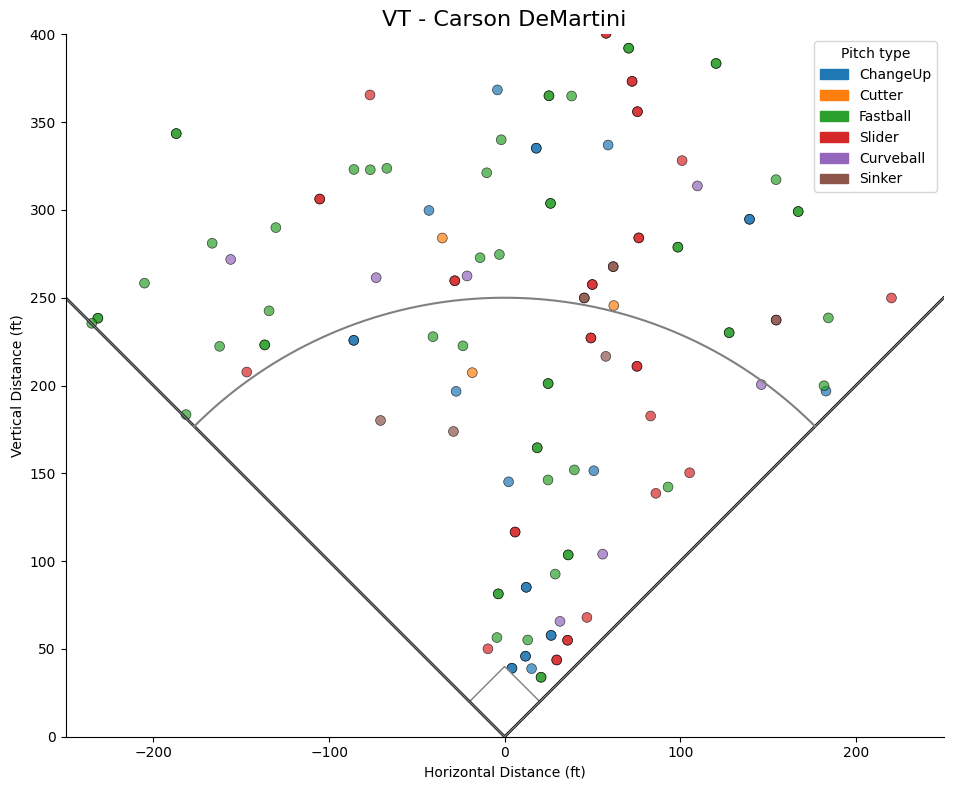

In [188]:
fair_vt = vt_filtered[
    (vt_filtered['Direction'] >= -45) &
    (vt_filtered['Direction'] <= 45) &
    (vt_filtered['Distance'] >= 30)
].dropna(subset=['Distance'])

fair_vt['Direction_rad'] = np.deg2rad(fair_vt['Direction'])
fair_vt['SprayX'] = fair_vt['Distance'] * np.sin((fair_vt['Direction_rad']))
fair_vt['SprayY'] = fair_vt['Distance'] * np.cos((fair_vt['Direction_rad']))

pitch_types = fair_vt['TaggedPitchType'].unique()
palette = dict(zip(pitch_types, sns.color_palette(n_colors=len(pitch_types))))
colors = fair_vt['TaggedPitchType'].map(palette)

fig,ax = plt.subplots(figsize=(12, 8))
outfield=plt.Circle((0,0),250, color='white', fill=True, zorder=0)
ax.add_artist(outfield)
ax.plot([0, -250], [0, 250], color='black', linewidth=2)
ax.plot([0, 250], [0, 250], color='black', linewidth=2)

ax.scatter(
    fair_vt['SprayX'],
    fair_vt['SprayY'],
    color=colors,
    alpha=0.7,
    edgecolor='black',
    linewidth=0.5,
    s=50
)

ax.set_xlim(-250, 250)
ax.set_ylim(0, 400)
ax.set_aspect('equal')
ax.set_facecolor('white')
sns.despine()
legend_handles = [Patch(color=palette[p], label=p) for p in pitch_types]
ax.legend(handles=legend_handles, title = 'Pitch type', loc='upper right')

theta = np.linspace(-np.pi/4, np.pi/4, 300)
arc_x = 250 * np.sin(theta)
arc_y = 250 * np.cos(theta)
ax.plot(arc_x, arc_y, color='gray', linewidth=1.5)

ax.plot([0, -250], [0, 250], color='gray', linewidth=1)
ax.plot([0, 250], [0, 250], color='gray', linewidth=1)

base_size = 20
diamond = patches.Polygon(
    [[0, 0], [base_size, base_size], [0, 2 * base_size], [-base_size, base_size]],
    closed=True, edgecolor='gray', facecolor='white'
)
ax.add_patch(diamond)

plt.title('VT - Carson DeMartini', fontsize=16)
plt.xlabel('Horizontal Distance (ft)')
plt.ylabel('Vertical Distance (ft)')
plt.tight_layout()
plt.show()



In [250]:
fair_vt = vt[
    (vt['Direction'] >= -45) &
    (vt['Direction'] <= 45) &
    (vt['Distance'] >= 30)
].dropna(subset=['Distance'])

fair_vt['Direction_rad'] = np.deg2rad(fair_vt['Direction'])
fair_vt['SprayX'] = fair_vt['Distance'] * np.sin((fair_vt['Direction_rad']))
fair_vt['SprayY'] = fair_vt['Distance'] * np.cos((fair_vt['Direction_rad']))

vt_batters = ['DeMartini, Carson', 'Martin, Christian', 'Cannizzaro, Chris', 'Grady, Clay', 'Cooke, Henry']
vt_subset = fair_vt[fair_vt['Batter'].isin(vt_batters)]
batters = vt_subset['Batter'].unique()

pitch_types = fair_vt['TaggedPitchType'].unique()
palette = dict(zip(pitch_types, sns.color_palette("hsv", n_colors=len(pitch_types)).as_hex()))
fair_vt['Color'] = fair_vt['TaggedPitchType'].map(palette)

fig= go.Figure()

for i, batter in enumerate(batters):
    batter_data = vt_subset[vt_subset['Batter'] == batter]
    fig.add_trace(go.Scatter(
        x=batter_data['SprayX'],
        y=batter_data['SprayY'],
        mode='markers',
        marker=dict(size=8, color=batter_data['TaggedPitchType'].map(palette),
                    line=dict(width=1, color='black')),
        name='',
        visible =(i==0),
        hovertemplate=(
            "Distance: %{customdata[0]} ft<br>" +
            "Pitch Type: %{customdata[1]}"
        ),
        customdata=np.stack((batter_data['Distance'], batter_data['TaggedPitchType']), axis=-1)
    ))

dropdown_buttons = [
    dict(
        label=batter,
        method='update',
        args=[
            {"visible": [i==j for j in range(len(batters))]},
            {"title": f"Spray Chart for {batter}"}
        ]
    )
    for i, batter in enumerate(batters)
]
foul_lines = [
    dict(type="line", x0=0, y0=0, x1=-250, y1=250, line=dict(color='red', width=2)),
    dict(type='line', x0=0, y0=0, x1=250, y1=250, line=dict(color='red', width=2))                                 
]

theta = np.linspace(-np.pi/4, np.pi/4, 200)
arc_x = 250*np.sin(theta)
arc_y = 250*np.cos(theta)
fig.add_trace(go.Scatter(x = arc_x, y=arc_y, mode='lines', line=dict(color='lightgray'), 
                         showlegend=False))

base_path = [
    dict(
        type='line',
        x0=0, y0=0,
        x1=15, y1=15,
        line=dict(color='black', width=2)
    ),
    dict(
        type='line',
        x0=15, y0=15,
        x1=0, y1=30,
        line=dict(color='black', width=2)
    ),
    dict(
        type='line',
        x0=0, y0=30,
        x1=-15, y1=15,
        line=dict(color='black', width=2)
    ),
    dict(
        type='line',
        x0=-15, y0=15,
        x1=0, y1=0,
        line=dict(color='black', width=2)
    ),
]


fig.update_layout(
    updatemenus=[
        dict(
            active=0,
            buttons=dropdown_buttons,
            x=0.7,
            xanchor='left',
            y=1.15,
            yanchor='top', 
        )
    ],
    shapes=foul_lines + base_path,
    title = f"VT Spray Chart",
    xaxis = dict(range=[-250, 250], title = 'Horizontal Distance'),
    yaxis=dict(range=[0, 400], title="Vertical Distance"),
    plot_bgcolor = 'white',
    width = 900,
    height=700,
    showlegend=False
)

fig.show()

In [179]:
odu = pd.read_csv('~/Downloads/Conferences/Conferences/05_06/Combined/5/budmethenycombined.csv', low_memory=False)
odu_batter = odu[odu['Batter'].str.contains('Waters, Luke', na= False)]

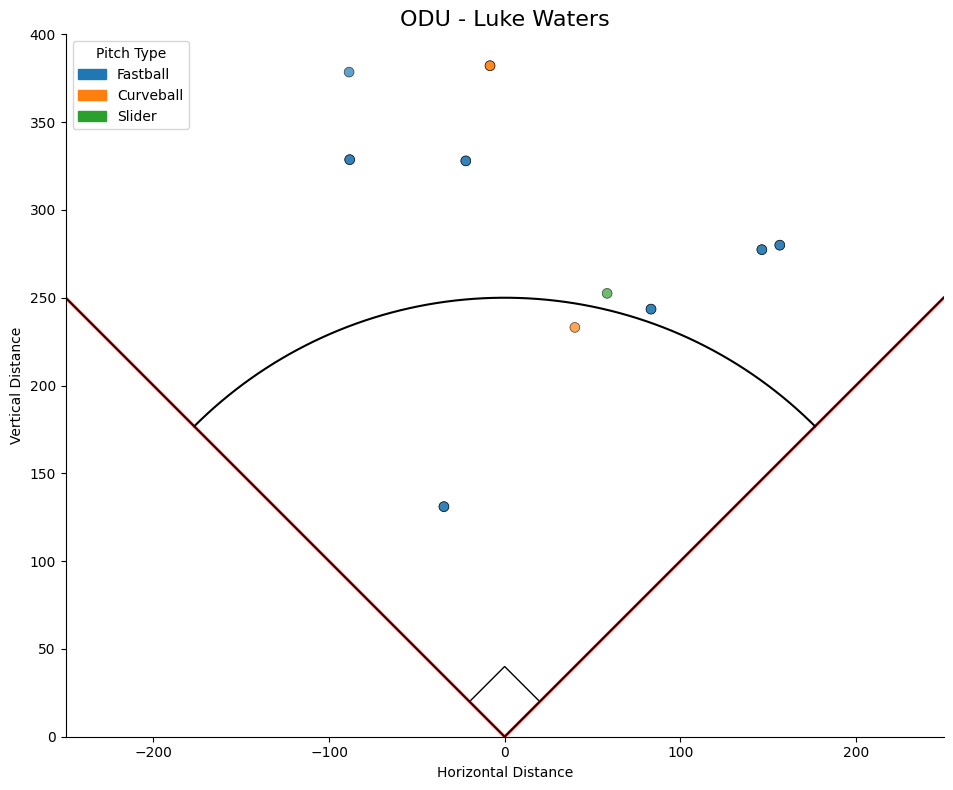

In [182]:
fair_odu = odu_batter[
    (odu_batter['Direction'] >= -45)  &
    (odu_batter['Direction'] <= 45) &
    (odu_batter['Distance'] >=30)
 ].dropna(subset=['Distance'])

fair_odu['Direction_rad'] = np.deg2rad(fair_odu['Direction'])
fair_odu['SprayX'] = fair_odu['Distance'] * np.sin(fair_odu['Direction_rad'])
fair_odu['SprayY'] = fair_odu['Distance'] * np.cos(fair_odu['Direction_rad'])

pitch_types = fair_odu['TaggedPitchType'].unique()
palette = dict(zip(pitch_types, sns.color_palette(n_colors=len(pitch_types))))
colors = fair_odu['TaggedPitchType'].map(palette)

fig,ax = plt.subplots(figsize=(12, 8))
outfield = plt.Circle((0, 0), 250, color='white', fill=True, zorder=0)
ax.add_artist(outfield)
ax.plot([0, -250], [0, 250], color='red', linewidth=2)
ax.plot([0, 250], [0,250], color='red', linewidth=2)

ax.scatter(
    fair_odu['SprayX'],
    fair_odu['SprayY'],
    color=colors,
    alpha=0.7,
    edgecolor='black',
    linewidth=0.5,
    s=50
)

ax.set_xlim(-250, 250)
ax.set_ylim(0, 400)
ax.set_aspect('equal')
ax.set_facecolor('white')
sns.despine()

theta = np.linspace(-np.pi/4, np.pi/4, 300)
arc_x = 250 * np.sin(theta)
arc_y = 250 * np.cos(theta)
ax.plot(arc_x, arc_y, color='black', linewidth=1.5)

ax.plot([0, -250], [0, 250], color='black', linewidth=1)
ax.plot([0, 250], [0, 250], color='black', linewidth=1)

base_size = 20
diamond = patches.Polygon(
    [[0, 0], [base_size, base_size], [0, 2 * base_size], [-base_size, base_size]],
    closed=True, edgecolor='black', facecolor='white'
)
ax.add_patch(diamond)

legend_handles = [Patch(color=palette[p], label=p) for p in pitch_types]
ax.legend(handles=legend_handles, title='Pitch Type', loc='upper left')

plt.title('ODU - Luke Waters', fontsize = 16)
plt.xlabel('Horizontal Distance')
plt.ylabel('Vertical Distance')
plt.tight_layout()
plt.show()



In [249]:
batters = ['Waters, Luke', 'Stallings, Maverick', 'Edwards, Kyle', 'Levari, Kenny', 'Holman, Evan']
odu_subset = odu[odu['Batter'].isin(batters)]
odu_batters = odu_subset['Batter'].unique()

fair_odu = odu[
    (odu['Direction'] >= -45)  &
    (odu['Direction'] <= 45) &
    (odu['Distance'] >=30)
 ].dropna(subset=['Distance'])

fair_odu['Direction_rad'] = np.deg2rad(fair_odu['Direction'])
fair_odu['SprayX'] = fair_odu['Distance'] * np.sin(fair_odu['Direction_rad'])
fair_odu['SprayY'] = fair_odu['Distance'] * np.cos(fair_odu['Direction_rad'])

pitch_types = fair_odu['TaggedPitchType'].unique()
palette = dict(zip(pitch_types, sns.color_palette("hsv", n_colors = len(pitch_types)).as_hex()))
fair_odu['Color'] = fair_odu['TaggedPitchType'].map(palette)

fig=go.Figure()

for i, batter in enumerate(odu_batters):
    batter_data = fair_odu[fair_odu['Batter']==batter]
    fig.add_trace(go.Scatter(
        x=batter_data['SprayX'],
        y=batter_data['SprayY'],
        mode='markers',
        marker=dict(size=8, color=batter_data['TaggedPitchType'].map(palette),
                    line=dict(width=1, color='black')),
        name='',
        visible = (i==0),
        hovertemplate = (
            "Distance: %{customdata[0]} ft<br>" +
            "Pitch Type: %{customdata[1]}"
        ),
        customdata=np.stack((batter_data['Distance'], batter_data['TaggedPitchType']), axis=1)
    ))

dropdown_buttons = [
    dict(
        label=batter,
        method='update',
        args=[
            {"visible": [i==j for j in range(len(odu_batters))]},
            {"title": f"Spray Chart for {batter}"}
        ]
    )
    for i, batter in enumerate(odu_batters)
]

foul_lines = [
    dict(type = 'line', x0=0, y0=0, x1=-250, y1=250, line=dict(color='red', width=2)),
    dict(type = 'line', x0=0, y0=0, x1=250, y1=250, line=dict(color='red', width=2))
]

theta = np.linspace(-np.pi/4, np.pi/4, 200)
arc_x = 250* np.sin(theta)
arc_y = 250 * np.cos(theta)
fig.add_trace(go.Scatter(x=arc_x, y=arc_y, mode='lines', line=dict(color='lightgray'), showlegend=False))

base_path = [
    dict(
        type='line',
        x0=0, y0=0,
        x1=15, y1=15,
        line=dict(color='black', width=2)
    ),
    dict(
        type='line',
        x0=15, y0=15,
        x1=0, y1=30,
        line=dict(color='black', width=2)
    ),
    dict(
        type='line',
        x0=0, y0=30,
        x1=-15, y1=15,
        line=dict(color='black', width=2)
    ),
    dict(
        type='line',
        x0=-15, y0=15,
        x1=0, y1=0,
        line=dict(color='black', width=2)
    ),
]

fig.update_layout(
    updatemenus=[
        dict(
            active=0,
            buttons=dropdown_buttons,
            x=0.7,
            xanchor = 'left',
            y=1.15,
            yanchor='top',
        )
    ],
    shapes=foul_lines + base_path,
    title = f"ODU (Interactive)",
    xaxis = dict(range=[-250, 250], title = 'Horizontal Distance'),
    yaxis = dict(range = [0,400], title = 'Vertical Distance'),
    plot_bgcolor='white',
    width=900,
    height=700,
    showlegend=False
)
fig.show()

In [239]:
unc = pd.read_csv('~/Downloads/Conferences/Combined_CSV/ACC_combined/errors/unccombined.csv', 
                  engine='python', on_bad_lines='skip')

In [240]:
unc_batter = unc[unc['Batter'].str.contains('Honeycutt, Vance', na=False)]
fair_unc = unc_batter[
    (unc_batter['Direction'] >= -45) &
    (unc_batter['Direction'] <= 45) &
    (unc_batter['Distance'] >= 30)
].dropna(subset=['Distance'])

fair_unc['Direction_rad'] = np.deg2rad(fair_unc['Direction'])
fair_unc['SprayX'] = fair_unc['Distance'] * np.sin(fair_unc['Direction_rad'])
fair_unc['SprayY'] = fair_unc['Distance'] * np.cos(fair_unc['Direction_rad'])

pitch_types = fair_unc['TaggedPitchType'].unique()
palette = dict(zip(pitch_types, sns.color_palette(n_colors=len(pitch_types))))
colors = fair_unc['TaggedPitchType'].map(palette)


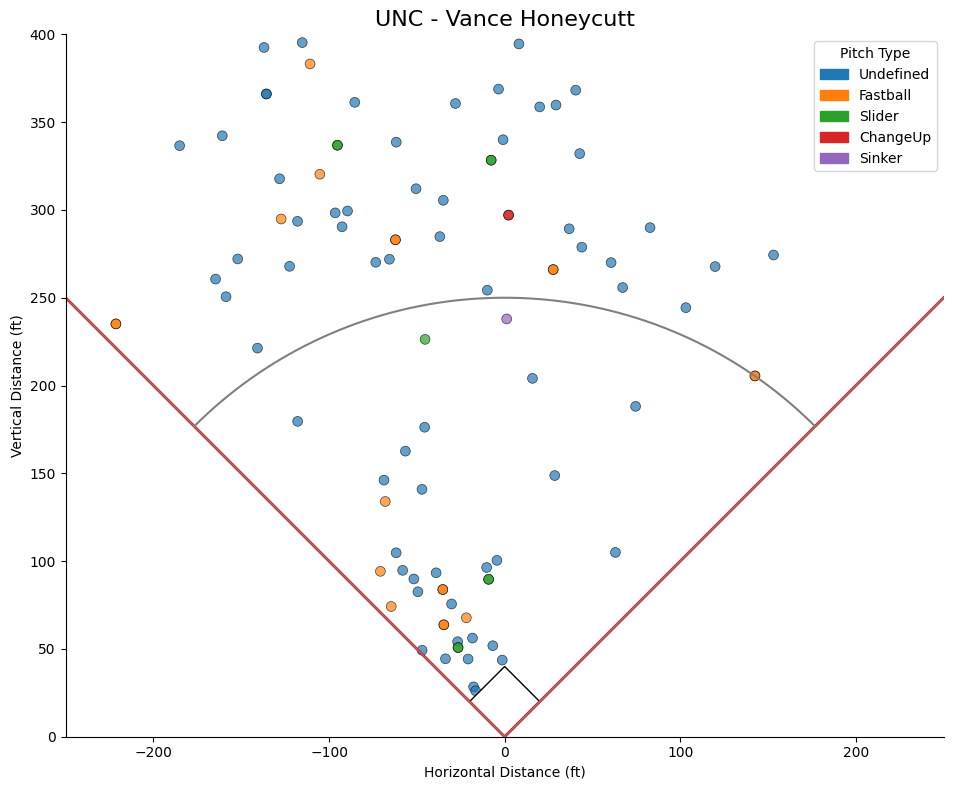

In [241]:
fig, ax= plt.subplots(figsize=(12, 8))

outfield=plt.Circle((0, 0), 250, color='white', fill=True, zorder=0)
ax.add_artist(outfield)
ax.plot([0, -250], [0, 250], color='red', linewidth=2)
ax.plot([0, 250], [0, 250], color='red', linewidth=2)

ax.scatter(
    fair_unc['SprayX'],
    fair_unc['SprayY'],
    color=colors,
    alpha=0.7,
    edgecolor='black',
    linewidth=0.5,
    s=50
)

ax.set_xlim(-250, 250)
ax.set_ylim(0,400)
ax.set_aspect('equal')
ax.set_facecolor('white')
sns.despine()

legend_handles = [Patch(color=palette[p], label=p) for p in pitch_types]
ax.legend(handles=legend_handles, title='Pitch Type', loc='upper right')

theta=np.linspace(-np.pi/4, np.pi/4, 300)
arc_x = 250 * np.sin(theta)
arc_y = 250 * np.cos(theta)
ax.plot(arc_x, arc_y, color='gray', linewidth=1.5)

ax.plot([0, 250], [0,250], color='gray', linewidth=1)
ax.plot([0,-250], [0,250], color='gray', linewidth=1)

base_size = 20
diamond = patches.Polygon(
    [[0, 0], [base_size, base_size], [0, 2 * base_size], [-base_size, base_size]],
    closed=True, edgecolor='black', facecolor='white'
)
ax.add_patch(diamond)

plt.title('UNC - Vance Honeycutt', fontsize=16)
plt.xlabel('Horizontal Distance (ft)')
plt.ylabel('Vertical Distance (ft)')
plt.tight_layout()
plt.show()

In [248]:
batters = ['Honeycutt, Vance', 'Frick, Tomas', 'Cook, Casey', 'Stokely, Hunter', 'Horvath, Mac']
unc_subset = unc[unc['Batter'].isin(batters)]
unc_batters = unc_subset['Batter'].unique()

unc_fair = unc[
    (unc['Direction'] >= -45) &
    (unc['Direction'] <= 45) &
    (unc['Distance'] >= 30)
].dropna(subset=['Distance'])

unc_fair['Direction_rad'] = np.deg2rad(unc_fair['Direction'])
unc_fair['SprayX'] = unc_fair['Distance'] * np.sin(unc_fair['Direction_rad'])
unc_fair['SprayY'] = unc_fair['Distance'] * np.cos(unc_fair['Direction_rad'])

pitch_types = unc_fair['TaggedPitchType'].unique()
palette = dict(zip(pitch_types, sns.color_palette("hsv", n_colors=len(pitch_types)).as_hex()))
unc_fair['Color'] = unc_fair['TaggedPitchType'].map(palette)

fig=go.Figure()

for i, batter in enumerate(unc_batters):
    batter_data = unc_fair[unc_fair['Batter'] == batter]
    fig.add_trace(go.Scatter(
        x=batter_data['SprayX'],
        y=batter_data['SprayY'],
        mode='markers',
        marker= dict(size=8, color=batter_data['TaggedPitchType'].map(palette),
                     line=dict(width=1, color='black')),
        name = '',
        visible = (i==0),
        hovertemplate=(
            "Distance: %{customdata[0]} ft<br>" +
            "Picth Type: %{customdata[1]}"
        ),
        customdata=np.stack((batter_data['Distance'], batter_data['TaggedPitchType']), axis=1)
    ))
    
dropdown_buttons = [
    dict(
        label=batter,
        method='update',
        args=[
            {"visible": [i==j for j in range(len(unc_batters))]},
            {"title": f"Spray Chart for {batter}"}
        ]
    )
    for i, batter in enumerate(unc_batters)
]

foul_lines = [
    dict(type='line', x0=0, y0=0, x1=-250, y1=250, line=dict(color='red', width=2)),
    dict(type='line', x0=0, y0=0, x1=250, y1=250, line=dict(color='red', width=2))
]

theta=np.linspace(-np.pi/4, np.pi/4, 300)
arc_x = 250 * np.sin(theta)
arc_y = 250 * np.cos(theta)
fig.add_trace(go.Scatter(x=arc_x, y=arc_y, mode='lines', line=dict(color='lightgray'), showlegend=False))

base_path = [
    dict(
        type='line',
        x0=0, y0=0,
        x1=15, y1=15,
        line=dict(color='black', width=2)
    ),
    dict(
        type='line',
        x0=15, y0=15,
        x1=0, y1=30,
        line=dict(color='black', width=2)
    ),
    dict(
        type='line',
        x0=0, y0=30,
        x1=-15, y1=15,
        line=dict(color='black', width=2)
    ),
    dict(
        type='line',
        x0=-15, y0=15,
        x1=0, y1=0,
        line=dict(color='black', width=2)
    ),
]

fig.update_layout(
    updatemenus=[
        dict(
            active=0,
            buttons=dropdown_buttons,
            x=0.7,
            xanchor = 'left',
            y=1.15,
            yanchor='top',
        )
    ],
    shapes=foul_lines + base_path,
    title = f"UNC (Interactive)",
    xaxis = dict(range=[-250, 250], title = 'Horizontal Distance'),
    yaxis = dict(range = [0,400], title = 'Vertical Distance'),
    plot_bgcolor='white',
    width=900,
    height=700,
    showlegend=False
)
fig.show()

